In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
auto_price = pd.read_csv('Automobile_price_data__Raw_.csv', sep = ',')
display(auto_price)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [3]:
auto_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [4]:
auto_price.drop(['symboling','normalized-losses'], axis=1, inplace=True)

In [5]:
# Convert object columns to numerical columns
cols = ['bore','stroke','horsepower','peak-rpm','price']
# args = ('coerce') => These columns have coersion of multiple dtype numeric + '?'
auto_price[cols] = auto_price[cols].apply(pd.to_numeric, args = ('coerce',))

In [6]:
auto_price.isnull().sum()

make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [7]:
# drops the rows with missing data for each column
auto_price.dropna(inplace=True)

#### Line Plot
    * Relationship Plot (Bivariate)
    * Trends Analysis - Univariate Analysis

<AxesSubplot:>

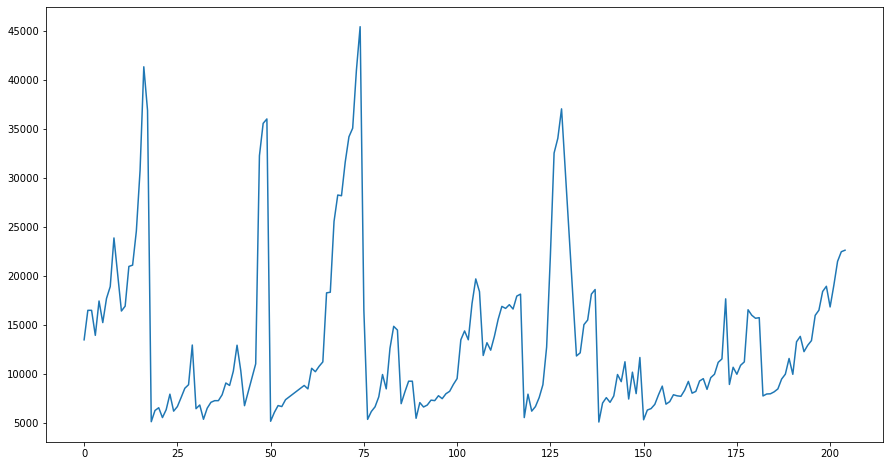

In [10]:
auto_price['price'].plot(kind = 'line', figsize = (15,8))

In [16]:
auto_price['price'].sort_values().unique()

array([ 5118.,  5151.,  5195.,  5348.,  5389.,  5399.,  5499.,  5572.,
        6095.,  6189.,  6229.,  6295.,  6338.,  6377.,  6479.,  6488.,
        6529.,  6575.,  6649.,  6669.,  6692.,  6695.,  6785.,  6795.,
        6849.,  6855.,  6918.,  6938.,  6989.,  7053.,  7099.,  7126.,
        7129.,  7198.,  7295.,  7299.,  7349.,  7395.,  7463.,  7499.,
        7603.,  7609.,  7689.,  7738.,  7775.,  7788.,  7799.,  7895.,
        7898.,  7957.,  7975.,  7995.,  7999.,  8013.,  8058.,  8189.,
        8195.,  8238.,  8249.,  8358.,  8449.,  8495.,  8499.,  8558.,
        8778.,  8845.,  8921.,  8948.,  8949.,  9095.,  9233.,  9258.,
        9279.,  9298.,  9495.,  9538.,  9549.,  9639.,  9959.,  9960.,
        9980.,  9988.,  9989.,  9995., 10198., 10245., 10295., 10345.,
       10595., 10698., 10795., 10898., 11048., 11199., 11245., 11248.,
       11259., 11549., 11595., 11694., 11850., 11900., 12170., 12290.,
       12440., 12629., 12764., 12940., 12945., 12964., 13200., 13295.,
      

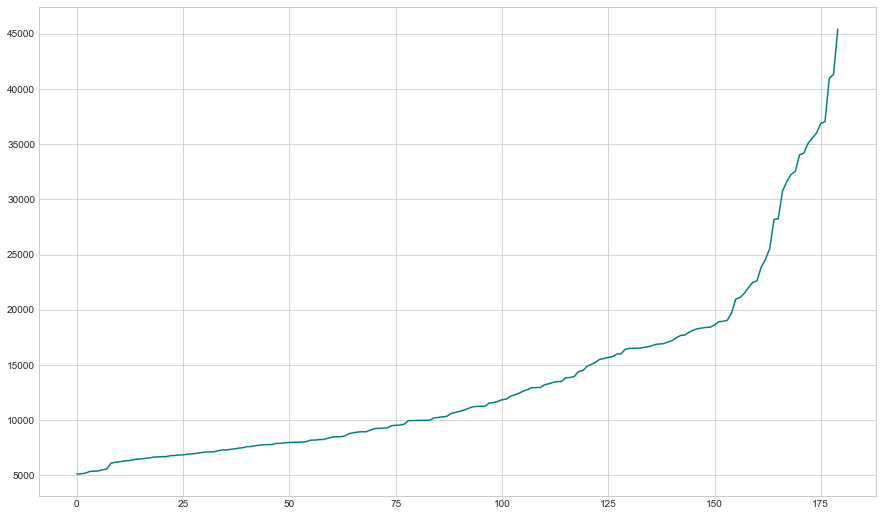

In [22]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (15,9))
plt.plot(auto_price['price'].sort_values().unique(), color = 'teal')
plt.show()

Text(0, 0.5, 'city mpg')

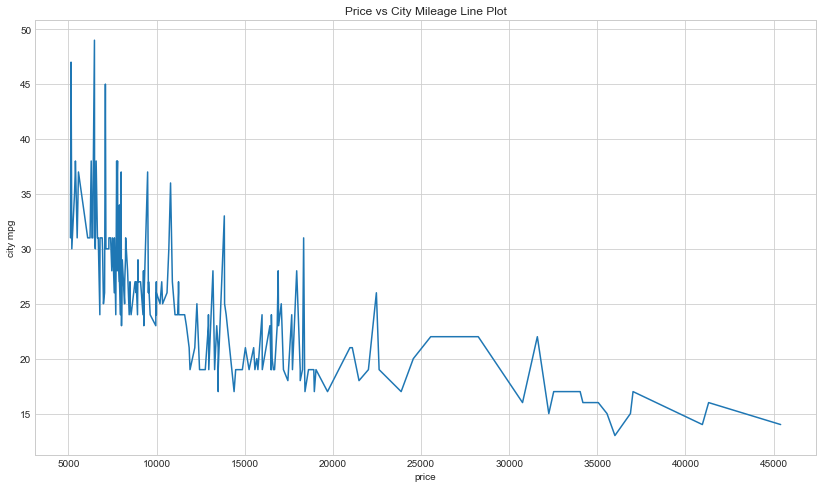

In [35]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (14,8))
# Bivariate = using two attributes
plt.plot(auto_price.sort_values(by = 'price')['price'], auto_price.sort_values(by = 'price')['city-mpg'])
plt.title('Price vs City Mileage Line Plot')
plt.xlabel('price')
plt.ylabel('city mpg')

#### Bar Plot
    * Bivariate Analysis
    * Bar chart used by Categorical , Nominal, Categorical vs. Value_Counts/Numerical/Continious
    * Bar Plots are used to display counts (.value_counts()) of unique value of categorical dtype, Height of Bar represents count for each category.

<AxesSubplot:>

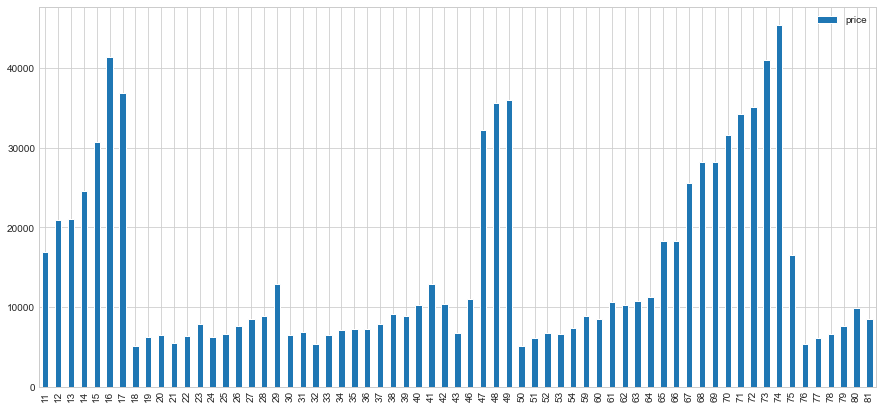

In [36]:
sns.set_style('whitegrid')
auto_price[['price']].iloc[10:75, ].plot.bar(figsize = (15,7))

<AxesSubplot:>

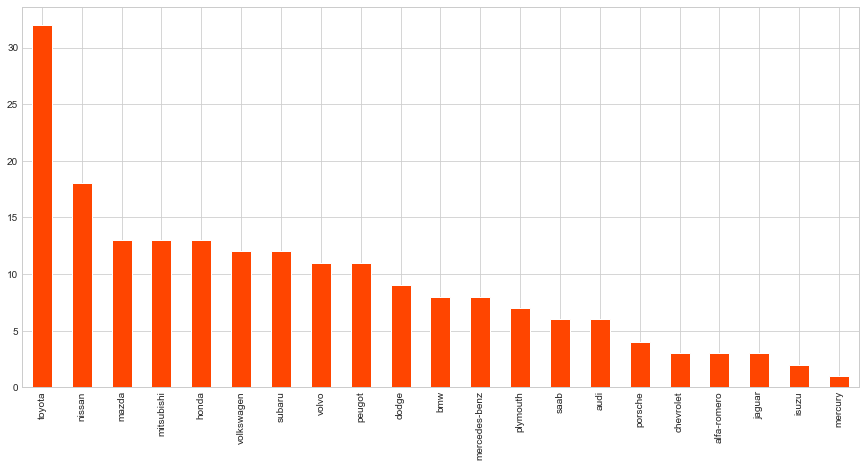

In [42]:
auto_price['make'].value_counts().plot.bar(figsize = (15,7), color = 'orangered')

#### Histogram
    * Continious Samples - Study the spread / Distribution of Data.
    * Univariate Analysis.

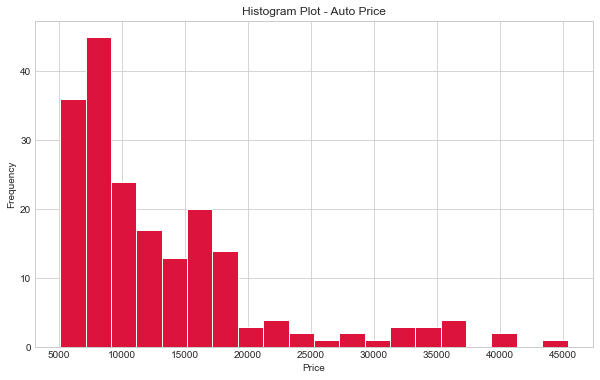

In [48]:
fig = plt.figure(figsize = (10,6))
# bins = Num of Intervals
# Positive Skewness
plt.hist(auto_price['price'], color = 'crimson', bins = 20)
plt.title('Histogram Plot - Auto Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

#### Distribution Plot
    * Histogram + KDE
    * Probability Density Function (PDF) -> Continious

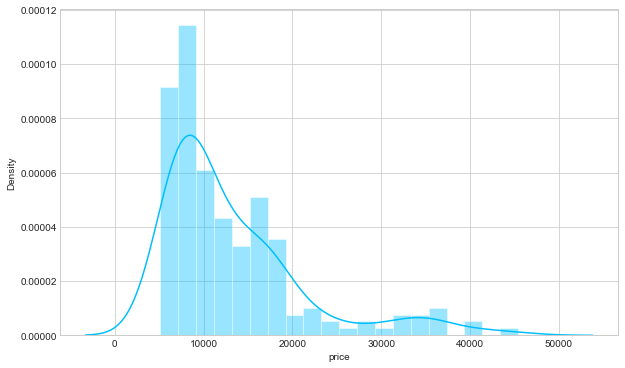

In [54]:
fig = plt.figure(figsize = (10,6))
sns.distplot(auto_price['price'], bins = 20, color = 'deepskyblue')
plt.show()

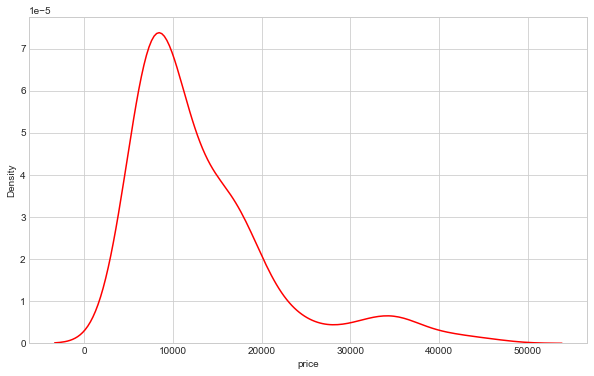

In [57]:
# Display Density Plot 
fig = plt.figure(figsize = (10,6))
sns.distplot(auto_price['price'], bins = 20, color = 'red', hist = False)
plt.show()

#### Subplots

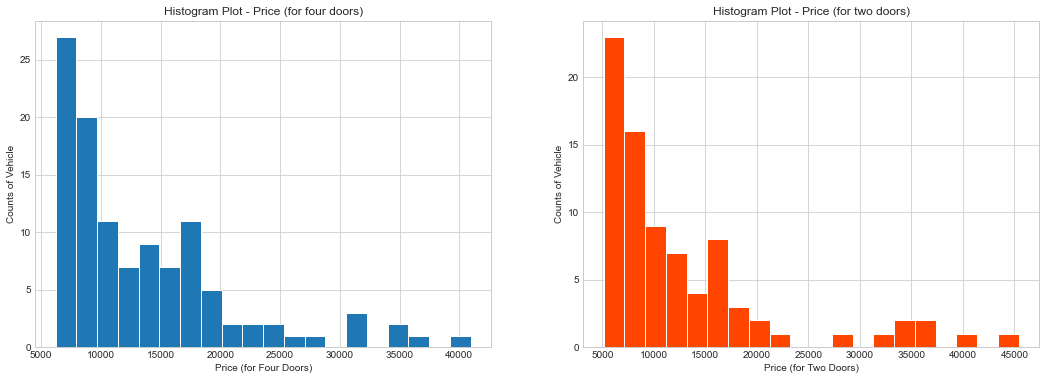

In [68]:
plt.figure(figsize = (18,6))
# (1, 2, 1) => 1st Row, 2nd Columns, 1st Position
plt.subplot(1, 2, 1)
plt.hist(auto_price[auto_price['num-of-doors'] == 'four']['price'], bins = 20)
plt.title('Histogram Plot - Price (for four doors)')
plt.xlabel('Price (for Four Doors)')
plt.ylabel('Counts of Vehicle')

plt.subplot(1, 2, 2)
plt.hist(auto_price[auto_price['num-of-doors'] == 'two']['price'], bins = 20, color = 'orangered')
plt.title('Histogram Plot - Price (for two doors)')
plt.xlabel('Price (for Two Doors)')
plt.ylabel('Counts of Vehicle')
plt.show()

#### Scatter Plot
    * Scatter Plot is plotted between numerical values.
    * Shows relationship b/w x & y plots.
    * Bivariate Analysis.

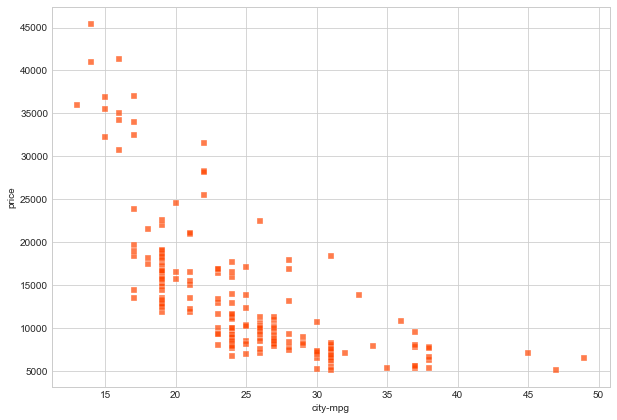

In [75]:
plt.figure(figsize = (10,7))
# alpha = transperancy
# marker = changing scatter plot style [o,x,X,s,d,>,<,*,.,^] 
sns.scatterplot(x = auto_price['city-mpg'], y = auto_price['price'], color = 'orangered', marker='s',
               alpha = 0.7)
plt.show()

In [ ]:
# Make Scatter-plot to observe relationship between highway-mpg & price for different categories of body-style

In [89]:
list(auto_price['body-style'].unique())

['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop']

In [115]:
body_style = list(auto_price['body-style'].unique())
colors_ = ['red','orangered','darkturquioise', 'deepskyblue','darkviolet']

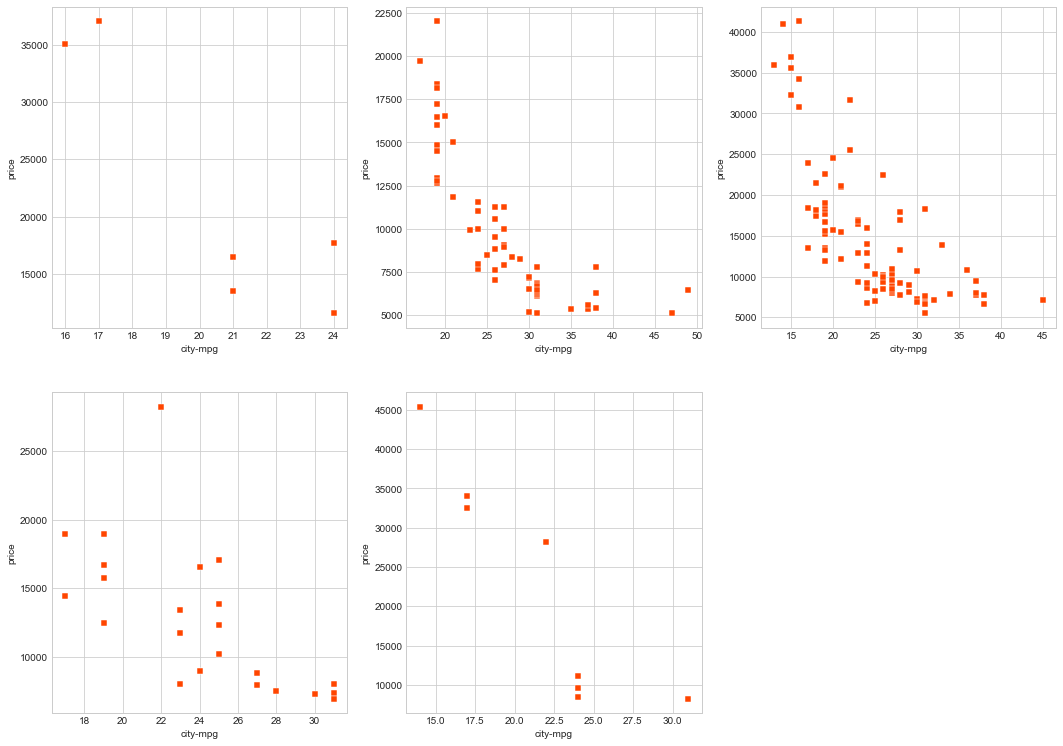

In [124]:
plt.figure(figsize = (18,13))
for index, style in enumerate(body_style):
    plt.subplot(2, 3, index + 1)
    sns.scatterplot(x = auto_price[auto_price['body-style'] == style]['city-mpg'], 
            y = auto_price[auto_price['body-style'] == style]['price'], color = 'orangered', marker='s')
plt.show()

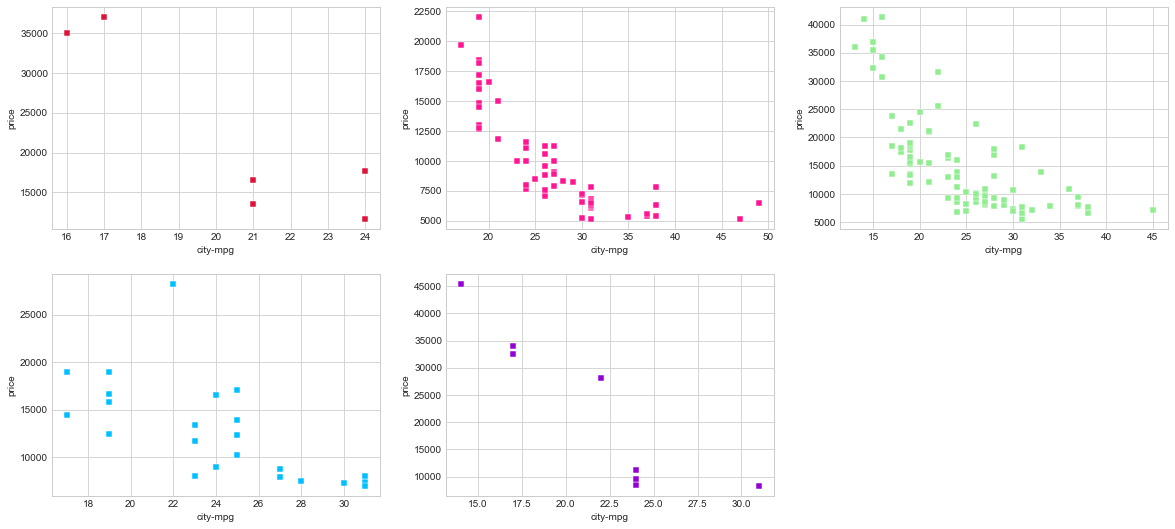

In [138]:
colors_ = ['crimson','deeppink','lightgreen', 'deepskyblue','darkviolet']
fig = plt.figure(figsize=(20,9))

for index, (style,label) in enumerate (zip(body_style, colors_)):
    plt.subplot(2, 3, index + 1)
    sns.scatterplot(x = auto_price[auto_price['body-style'] == style]['city-mpg'], 
            y = auto_price[auto_price['body-style'] == style]['price'], color = label, marker='s')
plt.show()

#### Pie-Chart

In [139]:
auto_price['make'].value_counts()

toyota           32
nissan           18
mazda            13
mitsubishi       13
honda            13
volkswagen       12
subaru           12
volvo            11
peugot           11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
saab              6
audi              6
porsche           4
chevrolet         3
alfa-romero       3
jaguar            3
isuzu             2
mercury           1
Name: make, dtype: int64

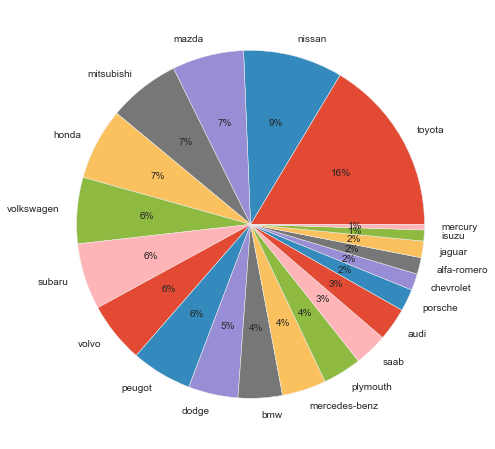

In [145]:
plt.style.use('ggplot')
plt.figure(figsize = (14,8))
plt.pie(auto_price['make'].value_counts(), labels = auto_price['make'].value_counts().index,
       autopct='%0.0f%%')
plt.show()

#### Countplot
    * Display Barplot Countplot of Categorical/Discrete Column Values

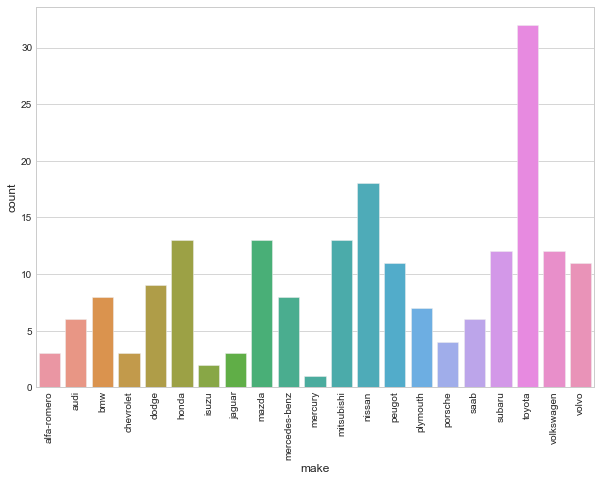

In [155]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,7))
sns.countplot(auto_price['make'])
plt.xticks(rotation = 90)
plt.show()